# Chapter 4: Applying Game Theory to the Real World

## 1. Introduction
Welcome to the interactive Jupyter Notebook for Chapter 4, "Applying Game Theory to the Real World." In this notebook, we will explore the fundamental concepts of the Divide-The-Cake game through Python simulations. We aim to provide hands-on experience with game theory concepts and demonstrate their applications in real-world scenarios.

Please follow along with the corresponding chapter in the book for detailed theoretical background and explanations of the concepts demonstrated here.

## 2. Understanding the Replicator Dynamics

Replicator dynamics is a fundamental concept in evolutionary game theory, describing how the distribution of strategies in a population evolves over time based on their relative success. This model is instrumental in understanding the natural selection of competing strategies within a population.

### The Mathematical Model

The core of replicator dynamics is represented by the following equation, which describes the change in frequency of a strategy over time:

\[ \frac{d x_i}{d t} = x_i \left( f_i - \bar{f} \right) \]

where:
- \(x_i\) is the frequency of strategy \(i\) in the population,
- \(f_i\) is the fitness (or payoff) of strategy \(i\),
- \(\bar{f}\) is the average fitness (or average payoff) of all strategies in the population, calculated as \(\bar{f} = \sum_{j=1}^{n} x_j f_j\),
- and \(n\) is the total number of strategies.

The equation captures the essence of natural selection: strategies that perform better than average (i.e., \(f_i > \bar{f}\)) increase in frequency, while those that perform worse than average (i.e., \(f_i < \bar{f}\)) decrease in frequency.

### Key Insights

- **Selection of Strategies:** Replicator dynamics illustrates how natural selection favors strategies that yield higher payoffs, leading to their proliferation in the population over time.
- **Evolutionary Stability:** This model helps identify Evolutionarily Stable Strategies (ESS), where if all members of a population adopt an ESS, no mutant strategy could invade and replace the existing strategy under the dynamics of natural selection.
- **Application to Game Theory:** In game theory, replicator dynamics offers a dynamic perspective on strategic interactions, providing insights into how strategies evolve in games such as the Prisoner's Dilemma.

By implementing replicator dynamics in simulations, we can observe these principles in action, gaining a deeper understanding of strategic evolution in competitive environments.

## 3. Replicator Dynamics and the Prisoner's Dilemma

In this section, we dive into the concept of the replicator dynamics, a fundamental mechanism in evolutionary game theory. The replicator dynamics describe how the frequency of strategies in a population evolves based on their success relative to the average success in the population.

We will apply these dynamics to the classic Prisoner's Dilemma. In this scenario, individuals must choose between cooperation and defection, with the payoffs of each decision affected by the choice of the other individual.

The Prisoner's Dilemma game illustrates the conflict between individual rationality and collective benefit, where the best individual strategy leads to a suboptimal outcome for all parties involved.

### Understanding the Replicator Dynamics

- **Cooperation and Defection**: Individuals in a population can either cooperate or defect. The payoffs for each action depend on the action of the other individual.
- **Payoffs**: The reward for cooperation is typically less than the temptation to defect but greater than the punishment for mutual defection. The lowest payoff comes from being the sucker — the one who cooperates while the other defects.
- **Evolution of Strategies**: Over time, strategies that perform better than the population average increase in frequency, while those that perform worse decrease.

### Exploring the Dynamics

In the following code cells, we will simulate these dynamics and visualize how the proportion of cooperators and defectors changes over time under different initial conditions and payoff structures. Keep an eye on how 'irrational' cooperation can emerge as a stable strategy even in a competitive setting like the Prisoner's Dilemma.

In [1]:
# Import the NumPy library for numerical operations
# NumPy is essential for handling arrays and matrices, which are fundamental in simulating game theory models and analyzing strategy outcomes.
import numpy as np

# Import matplotlib and seaborn libraries for plotting
# matplotlib is used for creating static, animated, and interactive visualizations in Python, making it invaluable for visualizing the dynamics and outcomes of game theory simulations.
# seaborn, built on top of matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics. It's used here to improve the aesthetics of plots, making the simulation results more intuitive and engaging.
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

# Set the style of the plots using seaborn for better aesthetics
# 'darkgrid' is chosen for its clean background and grid lines, which enhance the readability and presentation of plotted data.
sns.set_style('darkgrid')

# Enable interactive matplotlib figures in the Jupyter Notebook.
# This magic command (%matplotlib inline) ensures that plots are displayed directly below the code cells that produce them.
# It's crucial for interactive explorations in game theory simulations, allowing immediate visual feedback on the simulations' dynamics and outcomes.
%matplotlib inline

In [2]:
def replicator_dynamics(payoff_matrix, strategy_frequencies):
    """
    Calculate the replicator dynamics for a given payoff matrix and strategy frequencies.

    The replicator dynamics equation models how the frequency of strategies in a population change over time
    based on their payoffs compared to the average payoff in the population.

    Parameters:
    payoff_matrix (numpy.ndarray): The payoff matrix for the game, where payoff_matrix[i, j] represents
                                   the payoff received by strategy i when playing against strategy j.
    strategy_frequencies (numpy.ndarray): The current frequencies of each strategy in the population,
                                          where each element corresponds to a strategy and its value
                                          represents its proportion in the population.

    Returns:
    numpy.ndarray: The change in frequency of each strategy, indicating how each strategy's frequency
                   is expected to change based on the current state.
    """
    
    # Calculate the average payoffs for each strategy. This is done by matrix multiplication (@) of the
    # payoff matrix with the strategy frequencies vector. The result is a vector where each element
    # represents the average payoff received by a strategy given the current distribution of strategies.
    average_payoffs = payoff_matrix @ strategy_frequencies
    
    # Calculate the average population payoff. This is achieved by taking the dot product of the strategy
    # frequencies vector with the average payoffs vector. The result is a single number representing
    # the average payoff in the population given the current distribution of strategies.
    average_population_payoff = strategy_frequencies @ average_payoffs
    
    # Calculate the change in frequency of each strategy. This is the core of the replicator dynamics,
    # where the change in frequency for each strategy is proportional to the difference between its average
    # payoff and the average population payoff, multiplied by its current frequency. Strategies that perform
    # better than average will grow in frequency, while those that perform worse will decline.
    change_in_frequencies = strategy_frequencies * (average_payoffs - average_population_payoff)
    
    return change_in_frequencies

In [3]:
# Prisoner's Dilemma Payoffs
# Define the payoffs for the Prisoner's Dilemma, a fundamental game in game theory
# that illustrates why two rational individuals might not cooperate, even if it appears
# that it is in their best interest to do so.
temptation = 5  # Temptation to defect: The payoff a player receives if they defect while the other cooperates
reward = 3      # Reward for mutual cooperation: The payoff each player receives if both cooperate
punishment = 1  # Punishment for mutual defection: The payoff each player receives if both defect
sucker = 0      # Sucker's payoff: The payoff a player receives if they cooperate while the other defects

# Payoff matrix for Prisoner's Dilemma
# This matrix represents the payoffs for each combination of strategies between two players.
# The rows represent the strategy chosen by the player implementing the matrix, and the columns
# represent the strategy chosen by the other player. Each entry (i, j) in the matrix corresponds
# to the payoff the player receives when they choose strategy i and the other player chooses strategy j.
payoff_matrix = np.array([
    [reward, sucker],     # Row 0: Payoffs when the player cooperates (Cooperate-Cooperate, Cooperate-Defect)
    [temptation, punishment]  # Row 1: Payoffs when the player defects (Defect-Cooperate, Defect-Defect)
])

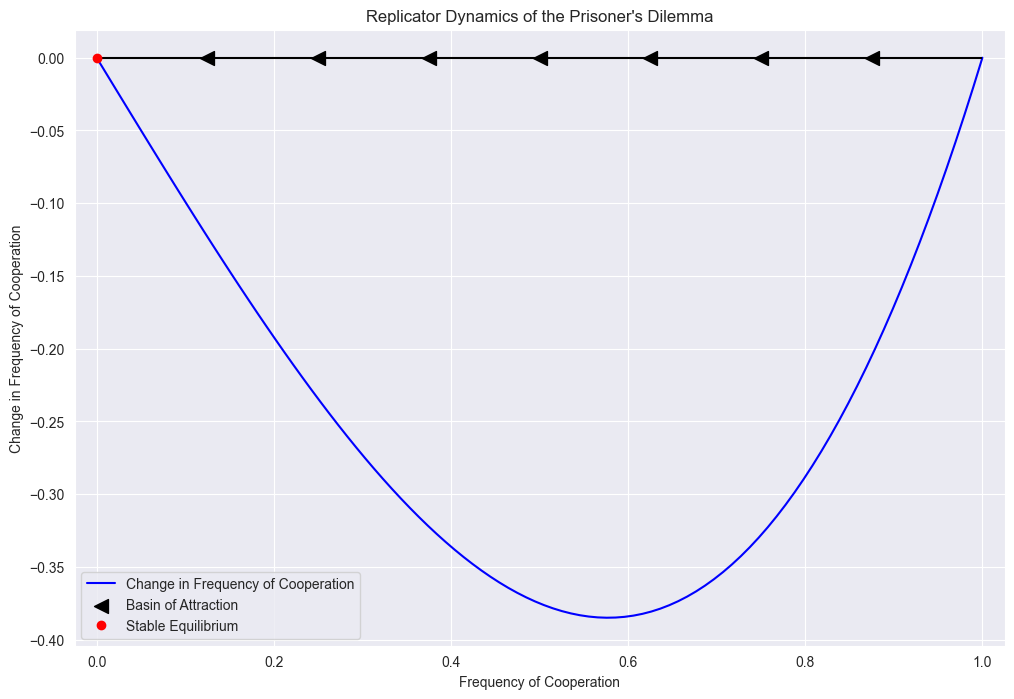

In [4]:
# Define the range of strategy frequencies for cooperation
# Creates an array of 100 evenly spaced values between 0 and 1. These represent the proportion of the population
# adopting a cooperative strategy, varying from complete defection (0) to complete cooperation (1).
p = np.linspace(0, 1, 100)
diff_coop = []  # Initialize a list to store the change in cooperation frequency for each proportion

# Calculate the change in cooperation frequency across the range of cooperation levels
for freq in p:
    # For each frequency of cooperation, calculate the corresponding frequency of defection
    strategy_frequencies = np.array([freq, 1 - freq])
    # Use the replicator dynamics function to calculate how the frequency of cooperation changes
    change = replicator_dynamics(payoff_matrix, strategy_frequencies)
    # Append the change in cooperation frequency to the list
    diff_coop.append(change[0])  # Focus on the change in cooperation frequency

# Plotting the results
plt.figure(figsize=(12, 8))
# Plot the change in cooperation frequency against the cooperation frequency itself
plt.plot(p, diff_coop, color='blue', label='Change in Frequency of Cooperation')
# Draw a horizontal line at y=0 from x=0 to x=1 to indicate no change in cooperation frequency
plt.hlines(0, xmin=0, xmax=1, color='black', linestyle='-')

# Indicate potential basins of attraction and stable equilibrium points
# Basins of attraction are marked with left-pointing triangle markers. They indicate frequencies
# at which small deviations in strategy frequencies would result in a return to the equilibrium.
for i in range(1, 8):
    plt.scatter(i/8, 0, marker='<', s=100, color='black', label='Basin of Attraction' if i == 1 else "")

# Plot the stable equilibrium point, if applicable, as a red circle ('ro')
# This example uses (0, 0) for demonstration purposes; adjust based on your model's results.
stable_equilibrium_point = (0, 0)
plt.plot(stable_equilibrium_point[0], stable_equilibrium_point[1], 'ro', label='Stable Equilibrium')
    
# Set plot labels and title for clarity
plt.xlabel('Frequency of Cooperation')
plt.ylabel('Change in Frequency of Cooperation')
plt.title("Replicator Dynamics of the Prisoner's Dilemma")
plt.legend(loc='best')  # Place the legend in the best location determined by Matplotlib
plt.xlim(-0.025, 1.025)  # Slightly extend the x-axis limits for visual clarity

# Save the figure with high resolution
plt.savefig('phase_diagram_prisoners.png', dpi=300)

# Display the plot
plt.show()

### 4. Explaining the Plot:

The graph shows how the strategy of cooperation evolves over time within a population playing the Prisoner's Dilemma, based on replicator dynamics. The x-axis, labeled "Frequency of Cooperation," represents the proportion of the population that chooses to cooperate at any given time, ranging from 0 (no one cooperates) to 1 (everyone cooperates).

The y-axis, labeled "Change in Frequency of Cooperation," shows the rate of change in the population's proportion of cooperators. Positive values would indicate an increasing trend in cooperation, while negative values indicate a decline in cooperation, leading to more defection.

The curve in blue represents the replicator dynamics — a mathematical description of how the frequency of cooperation changes based on the current state of the population. The payoffs for the strategies are set by the game's temptation (T), reward (R), punishment (P), and sucker (S) values, which you've defined as T=5, R=3, P=1, and S=0. These values influence the shape and position of the curve.

### How to Read the Plot:

1. **Starting Points**: Any point on the x-axis is a possible starting frequency of cooperation in the population.

2. **Trajectory of Change**: From any starting point, you can move vertically to the curve to understand the initial change in cooperation. If you hit the curve in a region where the y-value is negative (below the x-axis), it means that starting with that frequency of cooperation, you would expect to see a decrease in cooperation over time.

3. **Equilibrium Point**: The red dot on the x-axis represents a stable equilibrium. At this point, the change in frequency of cooperation is zero — if the population starts here, it stays here. For your plot, this point is at the extreme left, meaning that when no one cooperates, the population is in equilibrium.

4. **Basin of Attraction**: The black arrows (or triangles in your case) show the direction of change towards the stable equilibrium. They indicate that no matter where you start on the x-axis, the dynamics will "pull" the population towards the stable equilibrium point.

5. **Interpreting Dynamics**: The plot suggests that in this particular Prisoner's Dilemma setup, cooperation is not favored. No matter the initial frequency of cooperators, the population is expected to shift towards a state of full defection (frequency of cooperation is zero), as shown by the curve dipping below the x-axis across its entire span, except at the very ends.

In summary, this plot is a visual representation of the strategic dynamics within a population subject to the Prisoner's Dilemma. It helps us understand whether cooperation or defection will be favored over time given specific payoffs associated with each strategy. For the given payoff values, the plot indicates that the population will tend towards non-cooperation.

## 5. Lattice Models and Automata and the Prisoner's Dilemma

This section explores the Prisoner's Dilemma through lattice models and cellular automata, which provide a spatial structure to the game. Unlike traditional models that assume a well-mixed population, lattice models allow us to see the impact of locality on strategy evolution.

### Spatial Games and Automata

- **Spatial Structure**: Individuals are located on a lattice where they only interact with their neighbors. This limited interaction range can lead to different outcomes compared to a well-mixed population.
- **Cellular Automata**: A computational model used to simulate how strategies evolve over time on a lattice. Each cell represents an individual, and the state of each cell changes based on the states of its neighbors.

### Simulating the Prisoner's Dilemma on a Lattice

In our simulation, each cell on the lattice represents an individual playing the Prisoner's Dilemma with its immediate neighbors. The rules of the game are the same, but the limited interactions can lead to the emergence of cooperative clusters that would not exist in a well-mixed population.

The code cells in this section will run a cellular automaton simulation of the Prisoner's Dilemma, allowing us to observe the patterns and clusters of cooperation and defection that form over time.

In [5]:
# Import the correlate2d function from scipy.signal
# This function is used for two-dimensional correlation of arrays, which can be particularly useful in game theory simulations for analyzing patterns or strategies on grid-like structures. For example, it can be used to simulate spatial game theory models, where the spatial arrangement of players and their interactions are crucial.
from scipy.signal import correlate2d

# Import the math library
# The math library provides access to mathematical functions defined by the C standard. These functions are essential for performing various mathematical operations commonly encountered in game theory analyses, such as calculating logarithms, exponents, and trigonometric functions. This library supports the implementation of mathematical models and calculations underlying game theory concepts.
import math

In [6]:
class PrisonersDilemma2D:
    """Represents a 2-D Prisoner's Dilemma as an automaton."""

    def __init__(self, payoffs, rows):
        """Initializes the automaton.
        
        payoffs: represents the payoffs for strategies Cooperate and Defect.
        A: the numpy array that represents the automaton and contains the data.
        P: the numpy array that the first array writes the payoffs on.
        B: the numpy array that the second array writes the new states on."""
        self.payoffs = payoffs
        self.rows = rows
        self.cols = rows
        
        self.A = np.zeros((self.rows, self.cols), dtype = np.uint8)
        self.P = np.zeros_like(self.A)
        self.B = np.zeros_like(self.A)
        
    def init_center(self):
        """Adds a concentration of defectors in the middle of the lattice."""
        rows, cols = self.A.shape
        radius = min(rows, cols)//20
        i = rows//2
        j = cols//2
        self.A[i-radius:i+radius, j-radius:j+radius] += 1

    def init_random(self, prob=0.5):
        """Start with random values across the array.
        prob: the probability of a cell assigned Cooperate."""
        rows, cols = self.A.shape
        for row in range(rows):
            for col in range(cols):
                if np.random.random() < prob:
                    self.A[row, col] = 0
                else:
                    self.A[row, col] = 1

    def step(self):
        """Executes one time step of calculating the payoffs. It then determines
        the new values for the third array.
        
        t, r, p, s: the temptation, reward, punishment, and sucker payoffs.
        A: represents the first array with the initial state values.
        P: represents the second array with the payoffs.
        B: represents the third array with the new state values.
        kernel: represents a Moore(8) neighborhood. Has a radius of 1."""
        t, r, p, s = self.payoffs
        rows = self.rows
        cols = self.cols
        
        A = self.A
        P = self.P
        B = self.B
        
        kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
        
        """This counts the number of cooperators and defectors in a neighborhood.
        It returns an array."""
        d = correlate2d(A, kernel, mode = 'same', boundary = 'wrap')
        c = 9 - d
        
        """This calculates the expected payoff for a cell based on its neighborhood."""
        for row in range(rows):
            for col in range(cols):
                if A[row, col] == 1:
                    P[row, col] = t*c[row, col] + p*d[row, col]
                else:
                    P[row, col] = r*c[row, col] + s*d[row, col]
        
        """This compares a cell's payoff to its neighborhood and switches accordingly.
        It checks each neighbor for comparison."""
        for row in range(rows):
            for col in range(cols):
                for y in range(-1, 2):
                    for x in range(-1, 2):
                        if P[row, col] >= P[(row+y)%rows, (col+x)%cols]:
                            B[row, col] = A[row, col]
                        else:
                            B[row, col] = A[(row+y)%rows, (col+x)%cols]
        
        return B
    
    def anim_2D(self, steps):
        """Executes the animation for the automaton for the number of time steps."""
        fig = plt.figure()
        ims = []
        
        for s in range(steps):
            im = plt.imshow(self.A, vmin = 0, vmax = 1, cmap = 'binary', animated = True)
            ims.append([im])
            self.A = self.step()
        
        plt.axis('image')
        plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                labelbottom = False, labelleft = False)

        anim = animation.ArtistAnimation(fig, ims, interval = 150, blit = True,
                                repeat_delay = 2000)
        
        #anim.save('PD.mp4', writer = 'ffmpeg', fps = 5)
        return anim
    
    def plot_2D(self, steps):
        """Plots one step of the automaton for the number of time steps."""
        fig = plt.figure()
        
        for s in range(steps):
            plt.pcolor(self.A, vmin = 0, vmax = 1, cmap = 'binary')
            plt.axis('image')
            plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                            labelbottom = False, labelleft = False)
            plt.title('Time Step: ' + str(s))
            plt.draw()
            plt.pause(0.5)
            
            self.A = self.step()
        
    def plot_2D_series(self, total_steps, num_plots, skip_interval, filename='prisoners_dilemma_series.png'):
        """Plots a series of steps including the initial step and with skips in a grid and saves it as a PNG file."""
        # Determine the layout of the grid
        grid_size = math.ceil(math.sqrt(num_plots))
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 3, grid_size * 3))
        axes = [ax for sublist in axes for ax in sublist]  # Flatten the array of axes

        step = 0
        for i in range(num_plots):
            # Plot the current state
            ax = axes[i]
            ax.pcolor(self.A, vmin=0, vmax=1, cmap='binary')
            ax.set_title(f'Step: {step}')
            ax.axis('image')
            ax.set_xticks([])
            ax.set_yticks([])

            # Update the automaton state by skip_interval steps, if not the first plot
            if i >= 0:
                for _ in range(skip_interval):
                    self.A = self.step()
                    step += 1
                    if step >= total_steps:
                        break

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()
        
        plt.savefig(filename, dpi=300)
        plt.close(fig)  # Close the figure to free up memory

        print(f"Figure saved as '{filename}'")

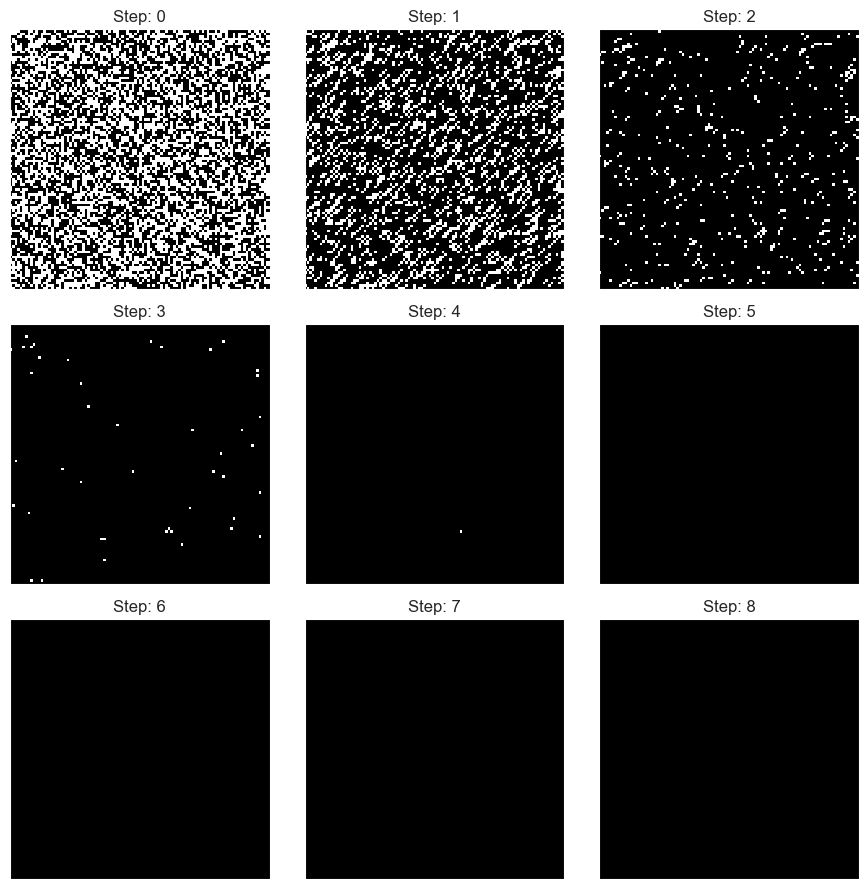

Figure saved as 'prisoners_dilemma_series_1.png'


<Figure size 640x480 with 0 Axes>

In [7]:
# Simulation 1
# Parameters for the first simulation scenario
payoffs = 5, 3, 1, 0
rows = 100
total_steps = 100   # Total number of steps in the simulation
num_plots = 9       # Number of plots to display (should be a perfect square for a square grid)
skip_interval = 1  # Number of steps to skip between plots
prob = 0.5

# Initialize the automaton
automaton = PrisonersDilemma2D(payoffs, rows)
automaton.init_random(prob)

# Create a grid of plots and save it
automaton.plot_2D_series(total_steps, num_plots, skip_interval, filename='prisoners_dilemma_series_1.png')

## 6. Evolution to the Stable State of Defection

The plot displays a series of snapshots representing the state of a 2-D grid over consecutive time steps in a simulation of the Prisoner's Dilemma. Each subplot corresponds to a different step in the simulation, starting from step 0 (top left) to step 8 (bottom right). 

- **Step 0**: The initial state of the grid, where cells represent individuals in a population. The black and white pixels indicate different strategies: cooperators and defectors, respectively. Initially, the distribution of strategies is random.
  
- **Step 1 to Step 8**: With each subsequent step, the strategies evolve according to the rules of the Prisoner's Dilemma. Cells may change their strategy based on the success of their own and neighboring strategies, according to the payoff matrix.

As we progress from left to right, top to bottom:

- The white pixels (defectors) become more prevalent initially, indicating that defection is a more successful strategy given the particular payoffs.
  
- After a certain point, the defectors seem to overtake the population completely, leaving very few cooperators (white pixels), and eventually, the grid becomes nearly or entirely black, indicating a population of mostly or all defectors.

This visualization helps in understanding the dynamics of cooperation and defection in a population over time under the conditions defined by the payoff matrix of the Prisoner's Dilemma.

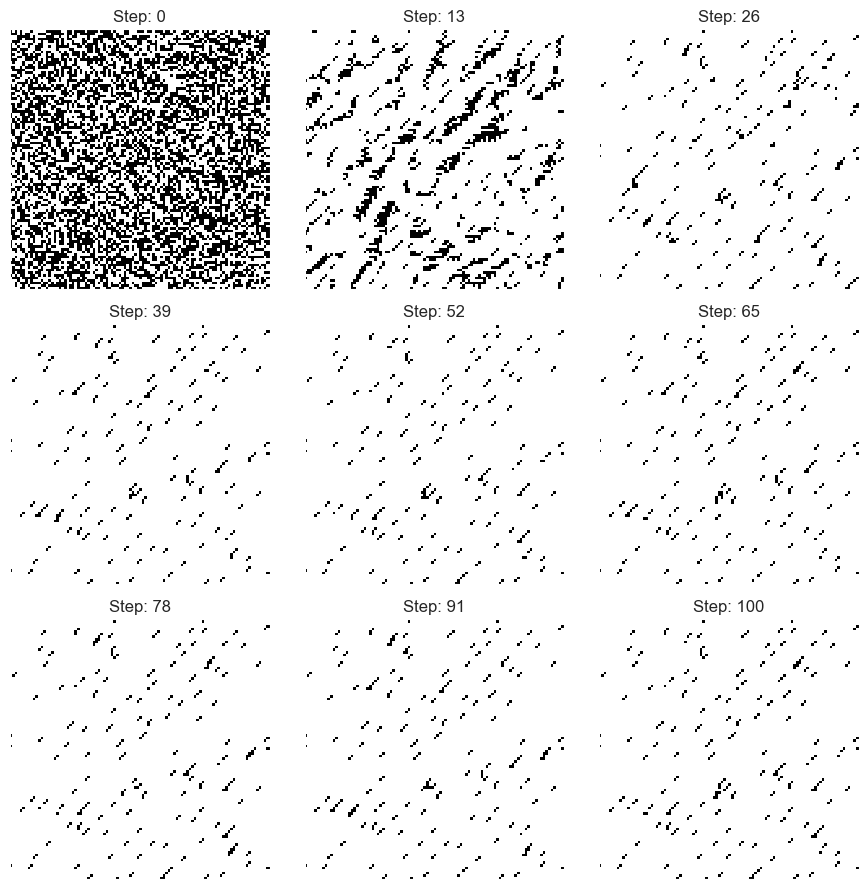

Figure saved as 'prisoners_dilemma_series_2.png'


<Figure size 640x480 with 0 Axes>

In [8]:
# Simulation 2
# Adjusted payoffs for a different dynamic
# Parameters
payoffs = 1.1, 1, 0, -0.1
rows = 100
total_steps = 100   # Total number of steps in the simulation
num_plots = 9       # Number of plots to display (should be a perfect square for a square grid)
skip_interval = 13  # Number of steps to skip between plots
prob = 0.5

# Initialize the automaton
automaton = PrisonersDilemma2D(payoffs, rows)
automaton.init_random(prob)

# Create a grid of plots and save it
automaton.plot_2D_series(total_steps, num_plots, skip_interval, filename='prisoners_dilemma_series_2.png')

## 7. Evolution to a Stable State of Cooperation and Defection

This plot is a sequence of snapshots showing the progression of the Prisoner's Dilemma in a 2-D grid across multiple time steps, from step 0 to step 100. Each subplot represents the state of the grid at a specific time step, with the sequence illustrating how the strategies evolve over time.

- **Step 0**: Shows the grid at the initial state with a random distribution of cooperators and defectors. The grid is densely populated with both strategies, represented by black and white pixels.

- **Step 13 and beyond**: As the simulation progresses, patterns start to emerge. Clusters or waves of defectors (black pixels) begin to form, creating distinct shapes and structures. These clusters appear to grow, shrink, or move across the grid as the simulation advances through time.

- **Step 39 to Step 100**: Over time, the clusters of defectors become more sparse and spread out. The patterns suggest that defectors are winning in some areas, creating trails as they potentially outcompete the cooperators. However, unlike the previous series, the grid does not become homogeneously black, indicating that a stable configuration between cooperators and defectors might be forming.

The plot provides insight into the spatial and temporal dynamics of the Prisoner's Dilemma, revealing how complex patterns of cooperation and defection can emerge from simple initial conditions and interactions. The presence of persistent structures in the later stages suggests that the specific payoff parameters used in this simulation may support the coexistence of strategies rather than leading to a single dominant strategy.

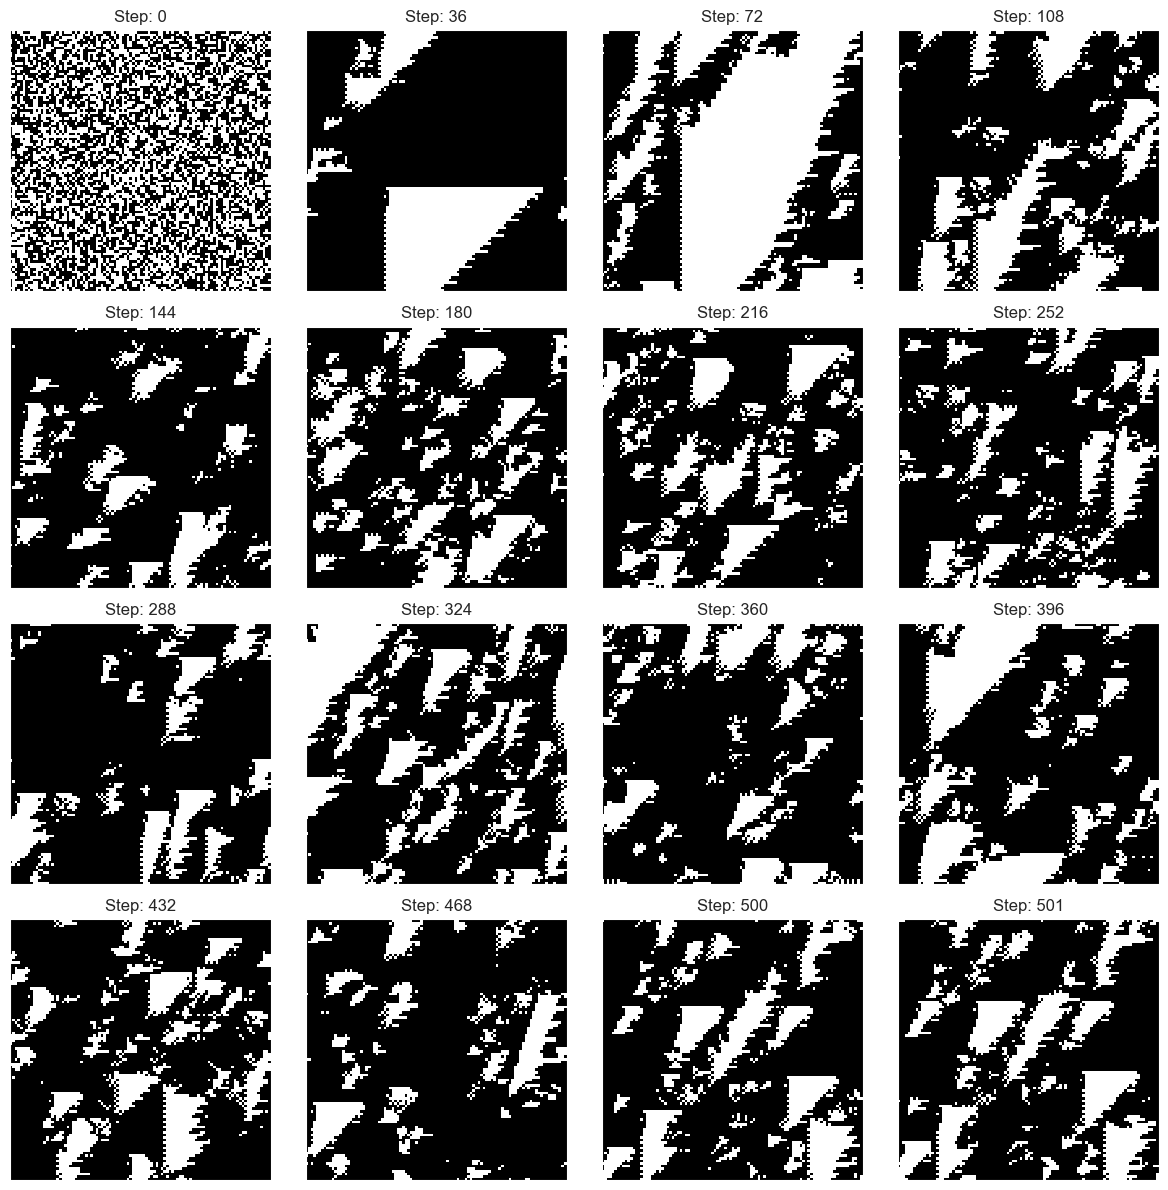

Figure saved as 'prisoners_dilemma_series_3.png'


<Figure size 640x480 with 0 Axes>

In [9]:
# Simulation 3
# Further adjusted payoffs and increased total steps and skip interval for a longer and more spaced-out visualization
# Parameters
payoffs = 1.6, 1, 0, -0.1
rows = 100
total_steps = 500   # Total number of steps in the simulation
num_plots = 16       # Number of plots to display (should be a perfect square for a square grid)
skip_interval = 36  # Number of steps to skip between plots
prob = 0.5

# Initialize the automaton
automaton = PrisonersDilemma2D(payoffs, rows)
automaton.init_random(prob)

# Create a grid of plots and save it
automaton.plot_2D_series(total_steps, num_plots, skip_interval, filename='prisoners_dilemma_series_3.png')

## 8. A Chaotic Cycle Between Cooperation and Defection

The displayed image is a series of snapshots taken at various steps throughout a simulation of the Prisoner's Dilemma on a two-dimensional grid. Each subplot illustrates the grid at a different point in time, demonstrating the evolution of strategies within the population from step 0 to step 501.

- **Step 0**: Represents the initial configuration of the grid, where the distribution of cooperators (white) and defectors (black) is random.

- **Step 36 to Step 108**: Early in the simulation, small clusters of cooperators and defectors start to form. This is a critical period where the initial conditions begin to influence the trajectory of the evolution.

- **Step 144 to Step 252**: As time progresses, these clusters become more pronounced. Defectors often form expanding fronts, but there are areas where cooperators persist or even dominate, likely due to the specific payoffs that encourage mutual cooperation or due to spatial configurations that protect cooperators.

- **Step 288 to Step 396**: Patterns of cooperation and defection become larger and more complex. The system does not settle quickly into a stable state, which suggests a balance between competitive strategies that result in dynamic and persistent patterns.

- **Step 432 to Step 501**: In the final snapshots, the system has evolved into a tapestry of strategies with large swathes of defectors interrupted by persistent pockets of cooperators. This indicates that under these particular game rules and payoffs, neither strategy completely outcompetes the other, resulting in a mixed equilibrium.

This series of images provides a compelling visualization of the dynamic and sometimes chaotic evolution of strategies in a spatial version of the Prisoner's Dilemma. It highlights the non-trivial outcomes that can arise from simple local interactions when extended over time and space.

## 9. The Veil of Ignorance and Equitable Outcomes

The final section of this chapter introduces the simplex plot, a tool used to visualize the dynamics of games with three or more strategies. We apply this to the "Divide the Cake" game, a metaphorical scenario that helps us understand how individuals might divide a resource.

### The Concept of the Simplex

- **Triangular Representation**: A simplex plot is a triangle where each vertex represents a pure strategy, and points inside the triangle represent mixed strategies.
- **Population Dynamics**: The position inside the simplex indicates the proportion of the population using each strategy.

### Applying the Simplex to "Divide the Cake"

"Divide the Cake" involves three strategies, each corresponding to a different claim on a divisible resource. The simplex plot will show us how different claims can coexist or outcompete each other in a population, based on the evolutionary dynamics encoded in the payoffs.

In the following visualization, we will see how the population's strategy distribution shifts over time. The simplex plot is color-coded to indicate the speed of change, with arrows demonstrating the direction in which the population's strategy profile is moving.

In [10]:
# Import the plot_static function from egtplot
# The egtplot library is specifically designed for visualizing evolutionary game theory (EGT) models. The plot_static function is used to create static visual representations of evolutionary game dynamics. These visualizations can depict the phase space of strategies, showing equilibrium points, strategy stability, and population dynamics over time. Using plot_static enhances the interpretability of EGT simulations, making it easier to convey complex dynamics and outcomes through graphical means.
from egtplot import plot_static

1it [00:00,  7.92it/s]


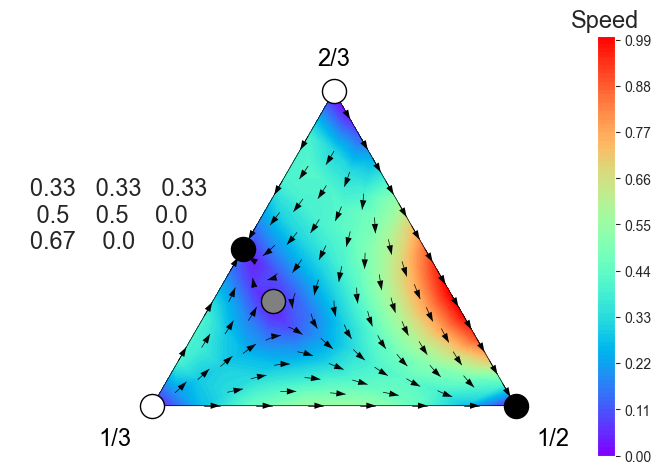

In [11]:
payoff_entries = [[1/3], [1/3], [1/3], [1/2], [1/2], [0], [2/3], [0], [0]]
labels = ["1/3", "1/2", "2/3"]

simplex = plot_static(payoff_entries, vert_labels=labels, background=True)

## 10. Understanding the Simplex Plot:
The `egtplot` library in Python is designed for visualizing evolutionary game theory (EGT) dynamics using plots such as phase portraits, simplex diagrams, and others. EGT studies the strategic interactions and dynamics within a population where the success of strategies is determined by their interactions with other strategies in the population.

The plot you've shared appears to be a simplex plot, a type of phase portrait used in EGT to represent the frequencies of strategies in a three-strategy game. Here's how to understand the plot:

1. **Vertices**: Each vertex (corner) of the triangle represents a population state where everyone in the population uses one of the three strategies exclusively. The left corner corresponds to everyone using the first strategy, the right corner to everyone using the second strategy, and the top corner to everyone using the third strategy.

2. **Interior Points**: Any point inside the triangle represents a mixture of strategies in the population. The closer a point is to a vertex, the higher the proportion of that strategy in the population.

3. **Color Gradient (Speed)**: The color inside the triangle typically represents the speed of the dynamics at that point, with warmer colors indicating faster changes in strategy frequencies and cooler colors indicating slower changes. The color bar to the right provides the scale for the speed.

4. **Arrows**: The arrows show the direction of the evolutionary dynamics. If you start at any point in the interior, following the arrows should show you the trajectory that the population's strategy mix will follow over time.

5. **Fixed Points**: These are marked by symbols such as circles or triangles. At a fixed point, the dynamics are stable; if the system reaches one of these points, it will remain there. 
   - **Open Circle**: An unstable fixed point. If the system is perturbed slightly, it will move away from this point.
   - **Filled Circle**: A stable fixed point. The system will evolve towards this point from the neighboring areas.
   - **Star**: A saddle point. It is stable in one direction but unstable in another.

### Reading the Plot:

- If you start with a population state represented by a point inside the triangle, you can predict the evolution of strategies by following the arrows. Over time, the population should move towards the stable fixed points (filled circles) and away from the unstable ones (open circles).

- The numbers along the edges give the coordinates for mixed strategies of two types. For example, the midpoint of an edge represents a population with a 50-50 mix of the two strategies at the vertices connected by that edge.

- The plot suggests that in the Divide-The-Cake game with the given payoffs, there are stable and unstable strategies. The stable strategies are where the population will tend to converge over time, given the evolutionary dynamics encoded in the payoffs and interactions.

This plot is a powerful tool for visualizing and understanding the dynamics of multi-strategy games in EGT, allowing researchers and students to gain insight into which strategies might persist, spread, or die out over time given certain conditions.


## 11. Summary of Notebook Learning Outcomes
This Jupyter notebook has provided a practical exploration of game theory concepts discussed in Chapter 4, "Applying Game Theory to the Real World," through engaging Python simulations. Here are the key highlights and learning outcomes from our journey:

### Key Highlights:
- **Introduction to Game Theory Applications:** We began with an overview of how game theory applies to real-world scenarios, setting a foundational understanding for our exploration.
- **Replicator Dynamics and the Prisoner's Dilemma:** Through detailed simulations, we delved into replicator dynamics within the context of the Prisoner's Dilemma, visualizing the evolution of strategies in a population over time.
- **Practical Implementations:** The notebook demonstrated the implementation of game theory models, including constructing payoff matrices and analyzing strategy evolution, with well-commented code to guide our understanding.

### Learning Outcomes:
- **Deepened Understanding of Game Theory Concepts:** The hands-on experience with the simulations has enhanced our understanding of key game theory concepts, reinforcing the theoretical knowledge presented in the chapter.
- **Insights into Theoretical Models Application:** By engaging with the models, we've seen firsthand how theoretical concepts are applied in decision-making scenarios, highlighting the dynamics between cooperation and competition.
- **Enhanced Critical Thinking and Analysis:** The interactive nature of the simulations encouraged critical thinking about strategy implications and the emergence of cooperation as a dominant strategy under certain conditions.

### Conclusion:
As a valuable companion to Chapter 4, this notebook has offered a dynamic and interactive way to engage with the complexities of game theory. The practical exercises have not only reinforced the chapter's theoretical discussions but also made accessible the profound implications of these concepts in understanding real-world scenarios. Through this exploration, we've gained both a deeper knowledge of game theory and an appreciation for its significant applicability to analyzing human behavior and strategic decision-making.